# World Happiness Report 

This project is a part of Data Science program conducted by Misk Hub.

<b>Team members:</b>
<ul>
    <li>Thekra Alqarni </li>
    <li>Munera Alrajhi</li>
    <li>Sanad Saleh</li>
    <li>Sarah Alharbi</li>
</ul>




<b>Summary </b>

    
  <p>The World Happiness Report is powered by data from the Gallup World Poll in collaboration  with Sustainable Development Solutions Network, Gallup World Poll tracks the most important issues worldwide, such as food access and well-being. They used telephone surveys in countries where telephone coverage represents at least 80% of the population. Also, all samples were probability based on nationally representative of the resident population aged 15 and older.</p>
  
  <p> Data was collected based on a 0 to 10,  cantril ladder scale, where respondents would rate the hhapiest, Life possible for them only as 10 and 0 is the worst life possible for them, then rate their own lives on that scale. The respondednt were asked to rate estimated extent to which each of six factors are estimated to contribute to making life evaluations higher in each country. The factors have no impact on the total score reported for each country, but instead are just a way of explaining that score (e.g. why people in x country rank higher?) </p>
  
 <b>Data Source: </b>
https://www.kaggle.com/unsdsn/world-happiness


## Table of Contents 
<ol>
<li>Exploratory Data Analysis (EDA)  </li>
    <ul>
        <li>Import libraries and data</li>
        <li>Dropping odd columns</li>
        <li>Renaming columns</li>
        <li>Create new columns "for Year and Region"</li>
        <li>Handle Missing Values</li>
        <li>Handle Missing column (Region)</li>
    </ul>
    
<li> Create one dataframe  </li>

</ol>


## Import the libraries

In [33]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

#importing necessary libraries for mapping
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

## Reading the data

In [5]:
# create 5 diffrent dataframes and read the data for each year.
df2015 = pd.read_csv("/Users/sarahalharbi/Documents/Misk_data_science/Misk_Learn_Py/data/archive/2015.csv") 
df2016 = pd.read_csv("/Users/sarahalharbi/Documents/Misk_data_science/Misk_Learn_Py/data/archive/2016.csv")
df2017 = pd.read_csv("/Users/sarahalharbi/Documents/Misk_data_science/Misk_Learn_Py/data/archive/2017.csv")
df2018 = pd.read_csv("/Users/sarahalharbi/Documents/Misk_data_science/Misk_Learn_Py/data/archive/2018.csv")
df2019 = pd.read_csv("/Users/sarahalharbi/Documents/Misk_data_science/Misk_Learn_Py/data/archive/2019.csv")

## Descriptive Statistics

In [6]:
df2015.describe()

df_list = [df2015, df2016, df2017, df2018, df2019]
df_list_names = ["df2015", "df2016", "df2017", "df2018", "df2019"]

for i, n in zip(df_list, df_list_names):
       print("This discribtion of", n,"dataset \n", i.describe())
    
    

This discribtion of df2015 dataset 
        Happiness Rank  Happiness Score  Standard Error  \
count      158.000000       158.000000      158.000000   
mean        79.493671         5.375734        0.047885   
std         45.754363         1.145010        0.017146   
min          1.000000         2.839000        0.018480   
25%         40.250000         4.526000        0.037268   
50%         79.500000         5.232500        0.043940   
75%        118.750000         6.243750        0.052300   
max        158.000000         7.587000        0.136930   

       Economy (GDP per Capita)      Family  Health (Life Expectancy)  \
count                158.000000  158.000000                158.000000   
mean                   0.846137    0.991046                  0.630259   
std                    0.403121    0.272369                  0.247078   
min                    0.000000    0.000000                  0.000000   
25%                    0.545808    0.856823                  0.439185   
50

In [7]:
# print the shape for each dataframe to know more about the structure.


df_list = [df2015, df2016, df2017, df2018, df2019]
df_list_names = ["df2015", "df2016", "df2017", "df2018", "df2019"]

for i, n in zip(df_list, df_list_names):
       print(i.shape)
    
    

(158, 12)
(157, 13)
(155, 12)
(156, 9)
(156, 9)


> As we can see, each dataframe has different number of rows and columns. Thus, we have to unified the structure in order to merge them in one dataframe.



### Renaming Column names

In [8]:

df2015.rename(columns={'Happiness Rank': "happiness_rank",  "Happiness Score": "happiness_score", "Economy (GDP per Capita)":"Economy", 
                                "Health (Life Expectancy)": "Health", "Freedom": "Freedom", "Generosity": "Generosity", "Trust (Government Corruption)":"Trust"}, inplace=True)
df2016.rename(columns={'Happiness Rank': "happiness_rank", "Happiness Score": "happiness_score", "Economy (GDP per Capita)":"Economy", 
                                "Health (Life Expectancy)": "Health", "Freedom": "Freedom", "Generosity": "Generosity", "Trust (Government Corruption)":"Trust"}, inplace=True)
df2017.rename(columns={'Happiness.Rank': "happiness_rank", "Happiness.Score": "happiness_score", "Economy..GDP.per.Capita.":"Economy", 
                                "Health..Life.Expectancy.": "Health", "Freedom": "Freedom", "Generosity": "Generosity", "Dystopia.Residual": "Dystopia Residual", "Trust..Government.Corruption.":"Trust"}, inplace=True)
df2018.rename(columns={'Overall rank': "happiness_rank", "Score": "happiness_score", "GDP per capita":"Economy", 
                                "Healthy life expectancy": "Health", "Freedom to make life choices": "Freedom", "Generosity": "Generosity", 'Social support':'Family','Perceptions of corruption':"Trust",'Country or region':'Country'}, inplace=True)
df2019.rename(columns={'Overall rank': "happiness_rank", "Score": "happiness_score", "GDP per capita":"Economy",  
                                "Healthy life expectancy": "Health", "Freedom to make life choices": "Freedom", "Generosity": "Generosity", 'Social support':'Family', 'Perceptions of corruption':"Trust", 'Country or region':'Country'}, inplace=True)                        

## Dropping unnecessary columns

In [9]:

df2015.drop(['Standard Error', "Dystopia Residual"] ,axis='columns', inplace=True)
df2016.drop(['Lower Confidence Interval','Upper Confidence Interval', "Dystopia Residual"],axis='columns', inplace=True)
df2017.drop(['Whisker.high','Whisker.low', "Dystopia Residual"],axis='columns', inplace=True)


## Adding "year" column

In [10]:
# create a new column to store the year in each dataframe
df2015["Year"] = 2015
df2016["Year"] = 2016
df2017["Year"] = 2017
df2018["Year"] = 2018
df2019["Year"] = 2019

## Handle the missing values

In [11]:
# carete function to check if there's any missing values
df_list = [df2015, df2016, df2017, df2018, df2019]
df_list_names = ["df2015", "df2016", "df2017", "df2018", "df2019"]

for i, n in zip(df_list, df_list_names):
    null_status = i.isnull().values.any()
    if null_status:
        print(n + " has missing values")
    else:
        print(n + " doesn't have any missing values")

df2015 doesn't have any missing values
df2016 doesn't have any missing values
df2017 doesn't have any missing values
df2018 has missing values
df2019 doesn't have any missing values


In [12]:
# To know more about the missing value in which column
print( df2018.isnull().sum())


happiness_rank     0
Country            0
happiness_score    0
Economy            0
Family             0
Health             0
Freedom            0
Generosity         0
Trust              1
Year               0
dtype: int64


In [13]:
# print out the row which has the missing value
df2018[df2018.isnull().any(axis=1)]


,happiness_rank,Country,happiness_score,Economy,Family,Health,Freedom,Generosity,Trust,Year
19,20,United Arab Emirates,6.774,2.096,0.776,0.67,0.284,0.186,NaN,2018


In [14]:
# fill the missing value with the mean of the column
df2018['Trust'].fillna((df2018['Trust'].mean()), inplace=True)


> We fill the missing value with mean of the Trust column 

## Handle the missing column
<p><i>Note; The region column only exist in 2015, 2016 datasets</i></p>



In [15]:
#Create a dataframe with country and region columns

df_new = df2015[['Country','Region']]

In [16]:
#Merge with 2017,2018,2019 datframes
df2017 =pd.merge( df_new,df2017,on='Country')
df2018 =pd.merge( df_new,df2018,on='Country')
df2019 =pd.merge( df_new,df2019,on='Country')


# Merge all the dataframes

In [17]:
df_merged = pd.concat([df2015, df2016, df2017, df2018, df2019], ignore_index  = True)
df_merged.head()

,Country,Region,happiness_rank,happiness_score,Economy,Family,Health,Freedom,Trust,Generosity,Year
0,Switzerland,Western Europe,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2015
1,Iceland,Western Europe,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2015
2,Denmark,Western Europe,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2015
3,Norway,Western Europe,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2015
4,Canada,North America,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2015


In [18]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          763 non-null    object 
 1   Region           763 non-null    object 
 2   happiness_rank   763 non-null    int64  
 3   happiness_score  763 non-null    float64
 4   Economy          763 non-null    float64
 5   Family           763 non-null    float64
 6   Health           763 non-null    float64
 7   Freedom          763 non-null    float64
 8   Trust            763 non-null    float64
 9   Generosity       763 non-null    float64
 10  Year             763 non-null    int64  
dtypes: float64(7), int64(2), object(2)
memory usage: 65.7+ KB


In [19]:
# orgnised the column indexes
df_merged = df_merged[['Country','Region','Year','happiness_rank','happiness_score','Economy','Family','Health','Freedom','Trust','Generosity']]


In [20]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          763 non-null    object 
 1   Region           763 non-null    object 
 2   Year             763 non-null    int64  
 3   happiness_rank   763 non-null    int64  
 4   happiness_score  763 non-null    float64
 5   Economy          763 non-null    float64
 6   Family           763 non-null    float64
 7   Health           763 non-null    float64
 8   Freedom          763 non-null    float64
 9   Trust            763 non-null    float64
 10  Generosity       763 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 65.7+ KB


In [21]:
df_merged.head(30)

,Country,Region,Year,happiness_rank,happiness_score,Economy,Family,Health,Freedom,Trust,Generosity
0,Switzerland,Western Europe,2015,1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,Western Europe,2015,2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,Western Europe,2015,3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,Western Europe,2015,4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,North America,2015,5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811
5,Finland,Western Europe,2015,6,7.406,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351
6,Netherlands,Western Europe,2015,7,7.378,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610
7,Sweden,Western Europe,2015,8,7.364,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262
8,New Zealand,Australia and New Zealand,2015,9,7.286,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501
9,Australia,Australia and New Zealand,2015,10,7.284,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562


In [23]:
init_notebook_mode(connected=True)

# Create map which indicate the happiness score for each country

data = dict(type = 'choropleth', 
           locations = df_merged['Country'],
           locationmode = 'country names',
           z = df_merged['happiness_score'], 
           text = df_merged['Country'],
            colorscale = 'Viridis', reversescale = True,
           colorbar = {'title':'Happiness Score'})
layout = dict(title = 'Global Happiness from 2015-2019', 
             geo = dict(showframe = False))
map1 = go.Figure(data = [data], layout=layout)
iplot(map1) 

> We can notice that the Sub-Saharan Africa countries, Afganistan and Syria have the lowest happiness score compared to other countries 



In [ ]:
pip uninstall plotly
y

In [21]:
pip install plotly==2.7.0

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     |████████████████████████████████| 25.0 MB 359 kB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for plotly: filename=plotly-2.7.0-py3-none-any.whl size=25015297 sha256=09ed186aedec9550a6d39de5b39f4bb915139c4381d83f17773ee94ebdd42531
  Stored in directory: /Users/sarahalharbi/Library/Caches/pip/wheels/90/fb/12/9936a8e0221e0e94a3f8e4ee44728fc191382d1ffb561b6fc9
Successfully built plotly
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbre

Text(0, 0.5, 'Scale')

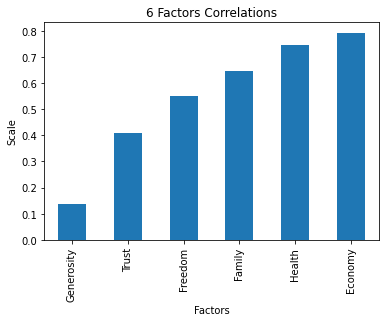

In [34]:
# Create list of Factors
factors = ['Health', 'Economy', 'Family','Freedom','Generosity','Trust']
# find the Correlations between the factors and happiness_score
corr_matrix=df_merged[["happiness_score"]+factors].corr()
corr_matrix = corr_matrix["happiness_score"].drop(['happiness_score'])

# Create a Chart for the 6 Factors Correlations
corr_matrix.sort_values(ascending=True).plot(kind='bar')
plt.title(('6 Factors Correlations'))
plt.xlabel("Factors ")
plt.ylabel('Scale')

- Economy and Health have strong correlation (>0.7)
- Family,freedom and Trust have average correlation (0.3 - 0.7)
- generosity have weak correlation (<0.3)

Text(0.5, 1.0, 'Correlation between factors')

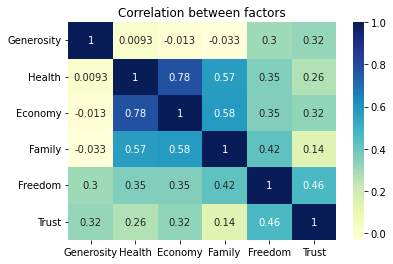

In [40]:
factors = ['Generosity','Health', 'Economy', 'Family', 'Freedom', 'Trust']
df_merged[factors]

corr_matrix = df_merged[factors].corr()
sns.heatmap(corr_matrix, annot = True, cmap="YlGnBu")
plt.title(('Correlation between factors'))